## Weekly trends plot for different years
* resampling frequency is 2 Days
* various rates of the chlor-a concentration
* "fixed scale" seems more illustrative than the "min-max scale"

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime
import datetime

In [3]:
# load the floats data 
# ********************
# *** CSV files ***
# ********************
# load CSV output    
#plt = plt.figure(8,6)
plt.close('all')
plt.cla()  # axis
plt.clf()  # figure
plt.show()

freq = 2
pref = 'df_chl_dist_out_'
surf =  '_modisa.csv'
infile = pref + str(freq) + 'D' + surf

folder = '../data_collector_modisa_chla9km/df_multidimInterpolation/'
direc = folder + infile
direc

print('in_filename and path:', direc)

df_tmp = pd.read_csv(direc, index_col='index')
df_tmp.sort_values(['id', 'time'])[:20]

in_filename and path: ../data_collector_modisa_chla9km/df_multidimInterpolation/df_chl_dist_out_2D_modisa.csv


,time,id,lat,temp,var_tmp,vn,var_lon,lon,var_lat,ve,...,chlor_a_log_e,chl_rate,chl_log_e_rate,chl_rate_stand,chl_log_e_rate_stand,chl_rate_week,chl_log_e_rate_week,week,week_rotate,dist
index,,,,,,,,,,,,,,,,,,,,,
1,2002-11-01,10206,10.737250,NaN,1000.000000,6.374250,0.000719,67.512250,0.000272,-4.832250,...,-2.014689,-0.001486,-0.011020,-0.019168,-0.057326,-0.010402,-0.077139,44,1,502.866078
260,2002-11-03,10206,10.818500,NaN,1000.000000,7.311375,0.000778,67.399375,0.000295,-8.207500,...,-1.960301,0.003727,0.027194,-0.015864,0.091292,0.026090,0.190358,44,1,514.302886
519,2002-11-05,10206,10.902250,NaN,1000.000000,5.807000,0.002068,67.291000,0.000666,-7.410625,...,-1.940023,0.001442,0.010139,-0.017312,0.024963,0.010096,0.070973,45,2,525.418388
778,2002-11-07,10206,11.036625,NaN,1000.000000,6.546875,0.000420,67.202125,0.000174,-6.844125,...,-2.039786,-0.006822,-0.049882,-0.022551,-0.208465,-0.047755,-0.349172,45,2,534.353712
1037,2002-11-09,10206,11.130625,NaN,1000.000000,4.402625,0.002828,67.113250,0.000866,-0.825125,...,-1.998625,0.002733,0.020581,-0.016494,0.065572,0.019128,0.144065,45,2,543.770628
1296,2002-11-11,10206,11.153750,NaN,1000.000000,0.028125,0.001112,67.132250,0.000387,0.870375,...,-2.057866,-0.003898,-0.029621,-0.020697,-0.129667,-0.027283,-0.207344,46,3,541.655587
1555,2002-11-13,10206,11.153250,NaN,1000.000000,2.077500,0.000949,67.105875,0.000329,-3.435000,...,-1.958813,0.006650,0.049526,-0.014011,0.178145,0.046548,0.346684,46,3,544.537084
1814,2002-11-15,10206,11.185250,NaN,1000.000000,-0.256875,0.009313,67.081500,0.002355,0.244250,...,-1.951589,0.000511,0.003612,-0.017902,-0.000421,0.003579,0.025285,46,3,547.160169
3368,2002-11-27,10206,11.290375,NaN,1000.000000,2.209500,0.004046,66.954125,0.001114,-2.474250,...,-2.011486,0.001250,0.009433,-0.017434,0.022217,0.008751,0.066030,48,5,561.105028


In [5]:
df_tmp['time'] = pd.to_datetime(df_tmp['time']) # ,format='%m/%d/%y %I:%M%p'
df_timed = df_tmp.set_index('time')
# add a new column to the dataset
df_timed['year'] = df_timed.index.year
df_timed[:20]

year_max = df_timed.index.year.max()
year_min = df_timed.index.year.min()
print('year_max', year_max)
print('year_min', year_min)
#print(df_timed)

year_max 2016
year_min 2002



 summary statistics of chl_rate_week for the year 2002 

count    90.000000
mean      0.164260
std       1.127157
min      -1.637868
25%      -0.041247
50%       0.007013
75%       0.064822
max       9.750447
Name: chl_rate_week, dtype: float64


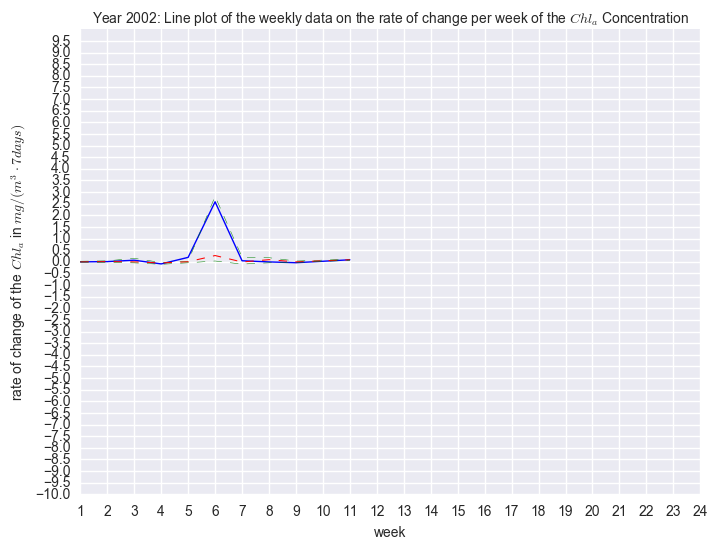

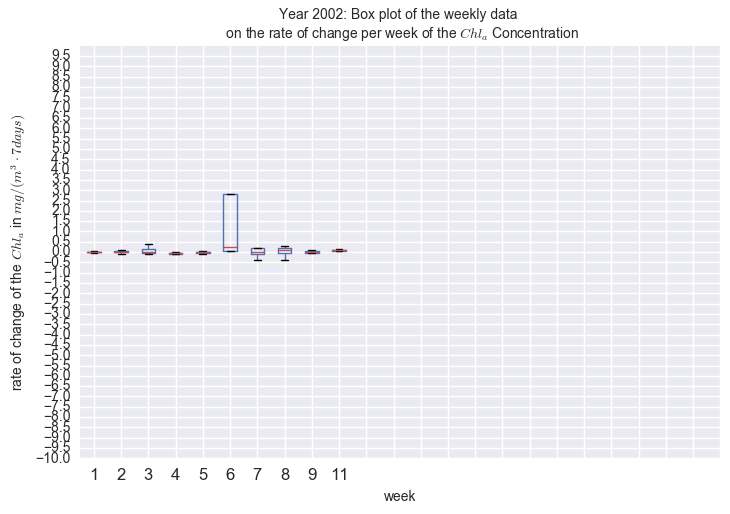


 summary statistics of chl_rate_week for the year 2003 

count    108.000000
mean      -0.023719
std       11.692654
min      -69.154118
25%       -0.208309
50%        0.011123
75%        0.216892
max       46.663716
Name: chl_rate_week, dtype: float64


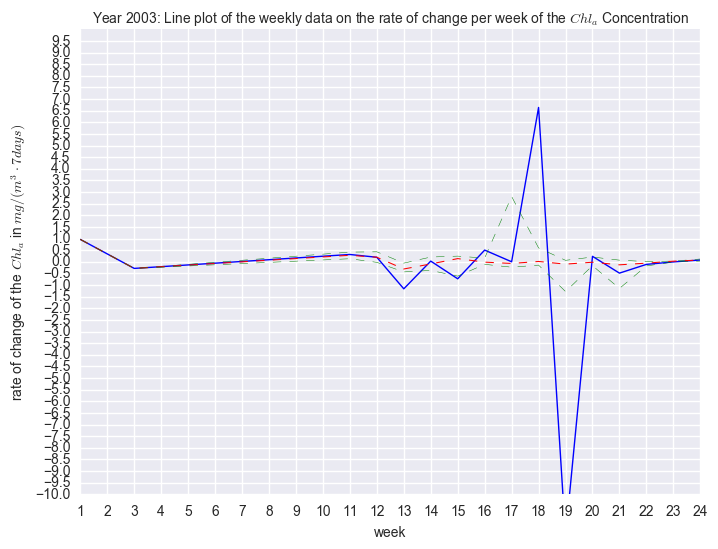

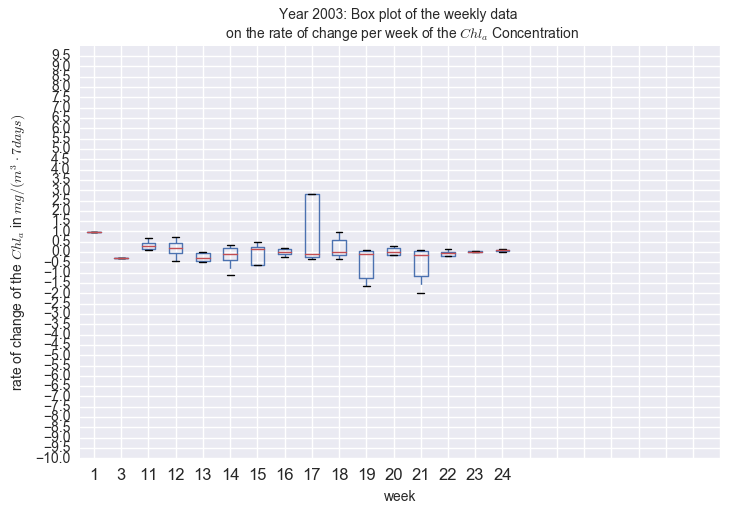


 summary statistics of chl_rate_week for the year 2004 

count    8.000000
mean     0.030804
std      0.116175
min     -0.081375
25%     -0.044966
50%      0.002731
75%      0.071391
max      0.277428
Name: chl_rate_week, dtype: float64


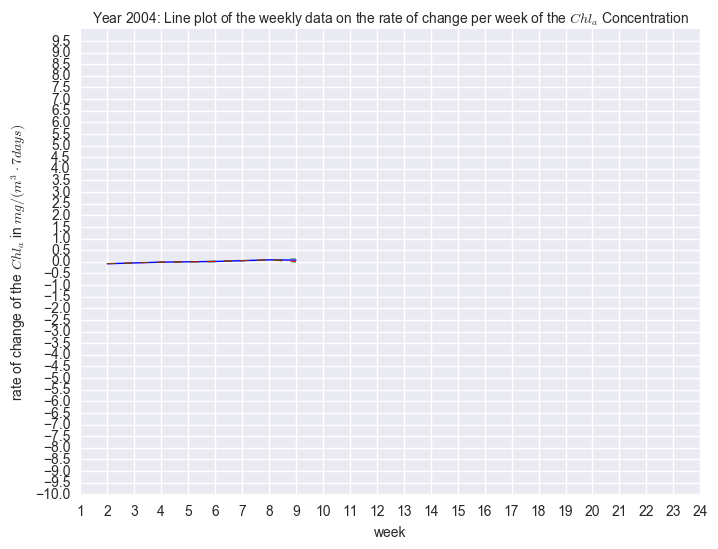

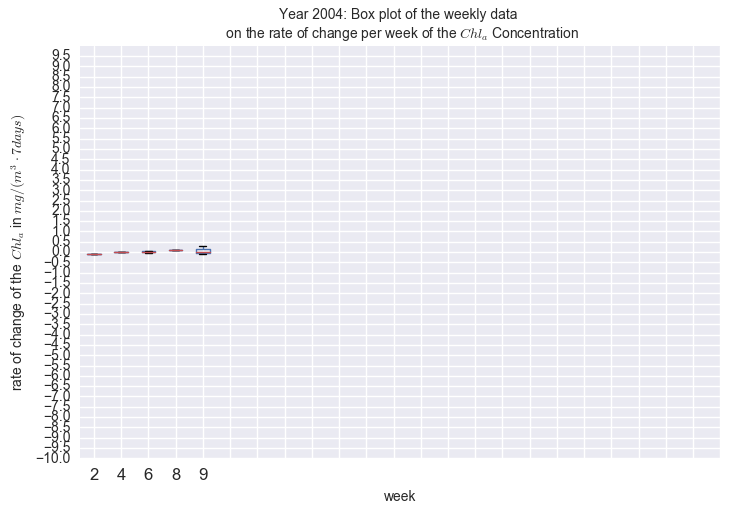


 summary statistics of chl_rate_week for the year 2005 

count    106.000000
mean       0.010666
std        0.296527
min       -0.879874
25%       -0.085455
50%       -0.002009
75%        0.097460
max        1.163664
Name: chl_rate_week, dtype: float64


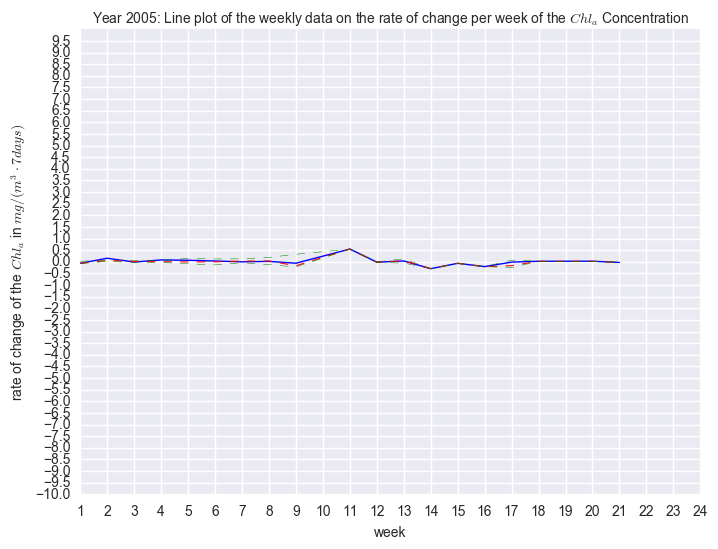

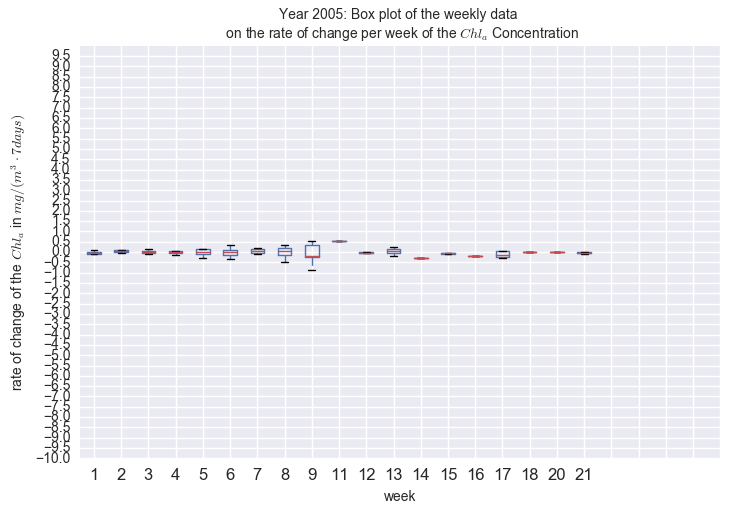


 summary statistics of chl_rate_week for the year 2006 

count    201.000000
mean      -0.038071
std        1.721764
min      -16.158397
25%       -0.110084
50%       -0.010593
75%        0.062009
max       14.456993
Name: chl_rate_week, dtype: float64


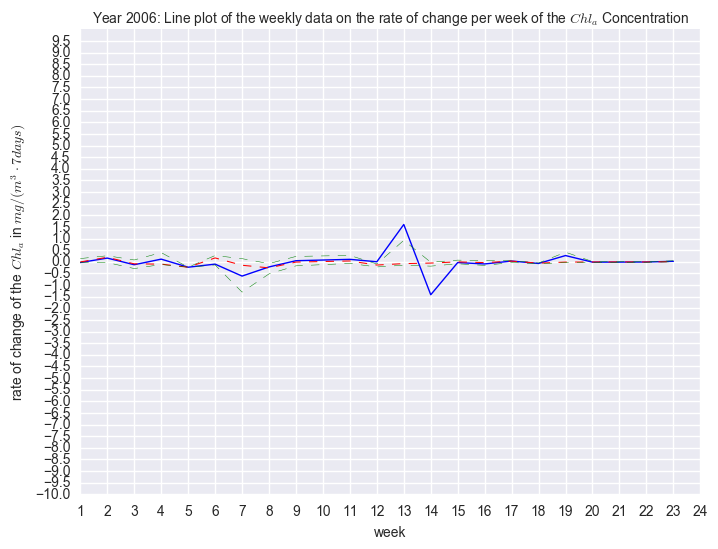

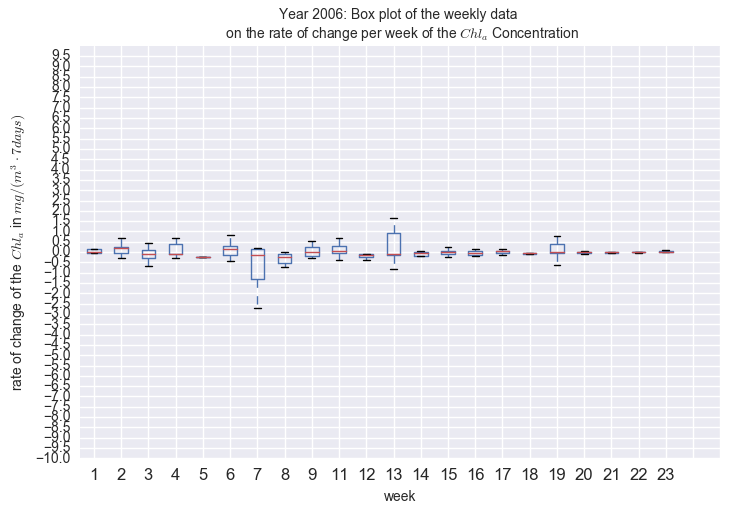


 summary statistics of chl_rate_week for the year 2007 

count    206.000000
mean       0.051636
std        0.438560
min       -1.730095
25%       -0.076108
50%        0.006083
75%        0.123297
max        2.967473
Name: chl_rate_week, dtype: float64


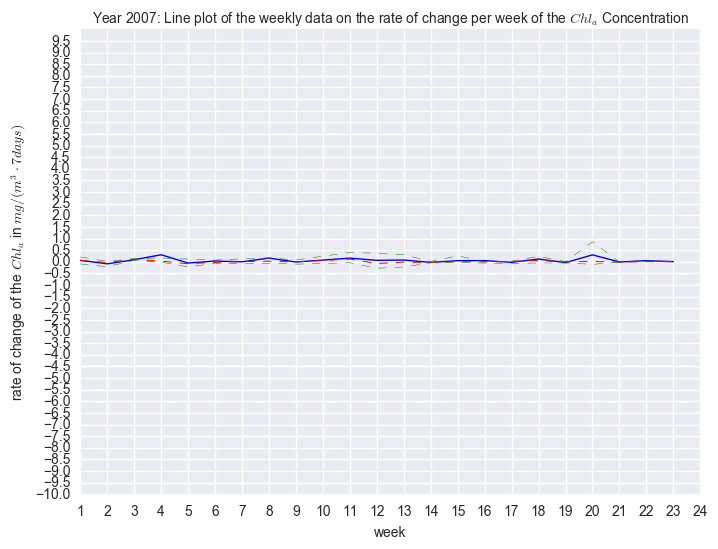

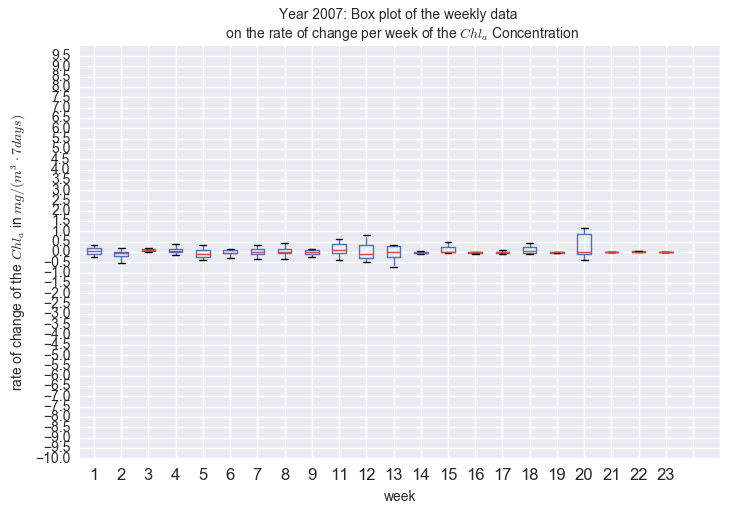


 summary statistics of chl_rate_week for the year 2008 

count    293.000000
mean       0.283979
std       16.263207
min      -94.308617
25%       -0.123734
50%       -0.005309
75%        0.111467
max       79.725910
Name: chl_rate_week, dtype: float64


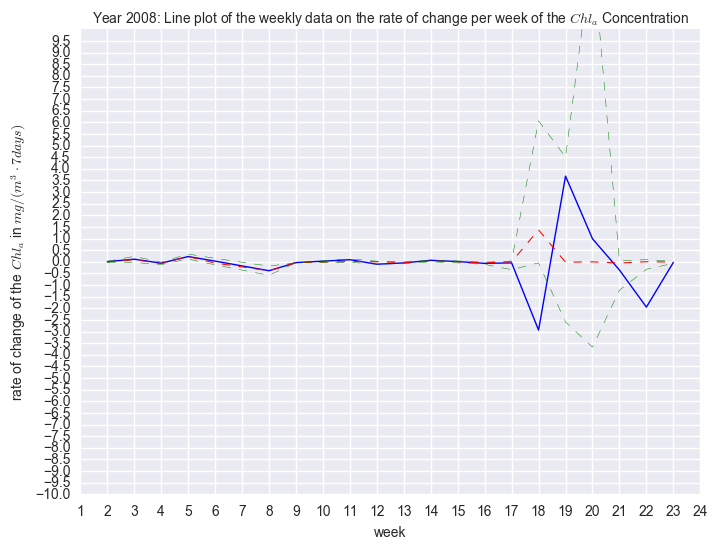

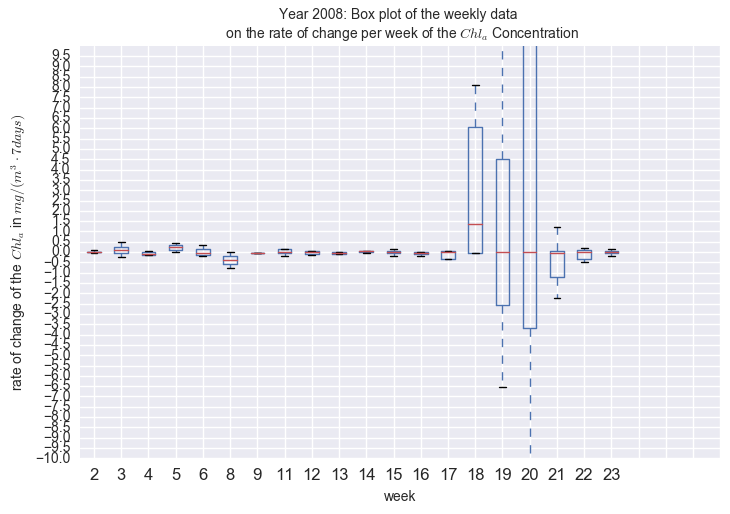


 summary statistics of chl_rate_week for the year 2009 

count    89.000000
mean     -0.443150
std       3.993296
min     -36.562424
25%      -0.070949
50%      -0.006755
75%       0.077960
max       7.036528
Name: chl_rate_week, dtype: float64


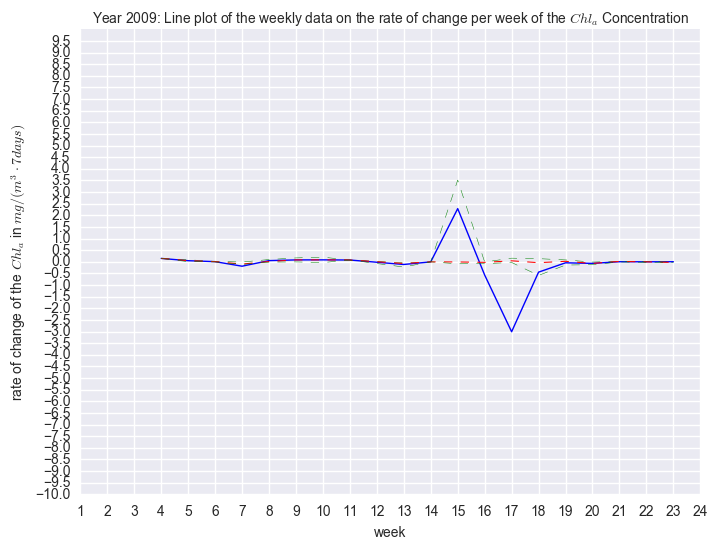

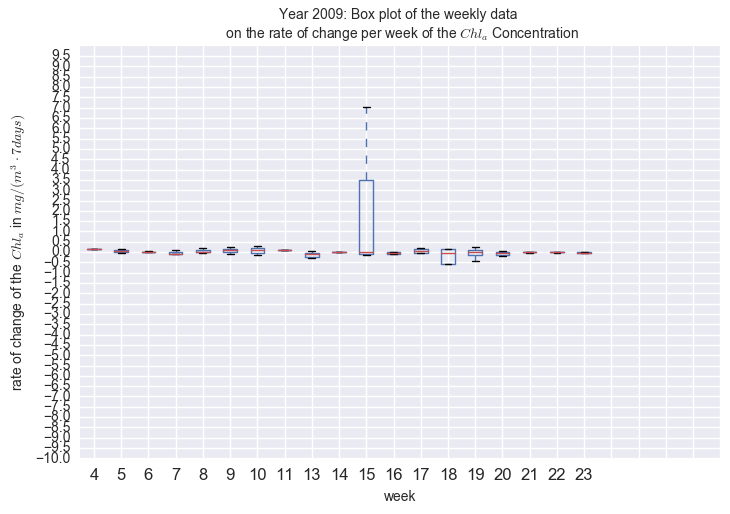


 summary statistics of chl_rate_week for the year 2010 

count    149.000000
mean      -0.023245
std        0.218063
min       -1.007590
25%       -0.059863
50%       -0.007450
75%        0.051831
max        0.612091
Name: chl_rate_week, dtype: float64


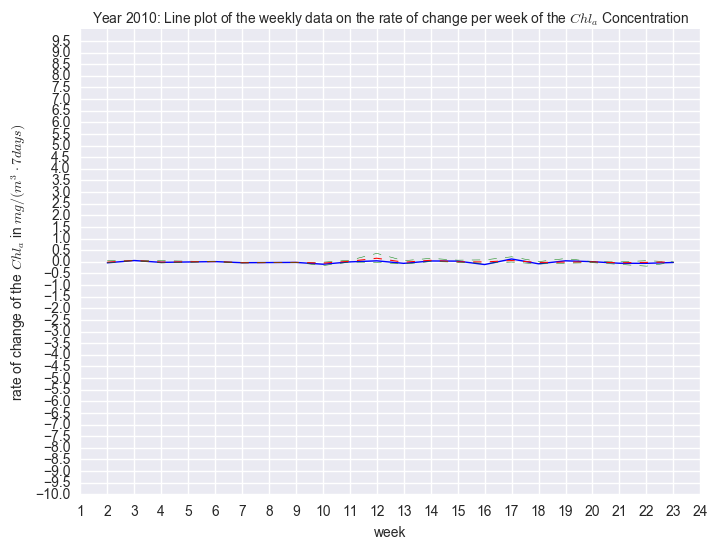

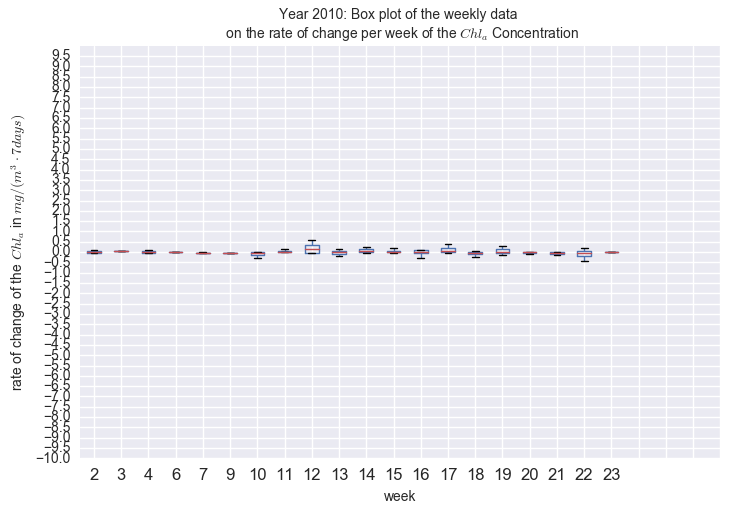


 summary statistics of chl_rate_week for the year 2011 

count    30.000000
mean      0.251446
std       1.063232
min      -0.380810
25%      -0.027995
50%      -0.000409
75%       0.118452
max       5.737800
Name: chl_rate_week, dtype: float64


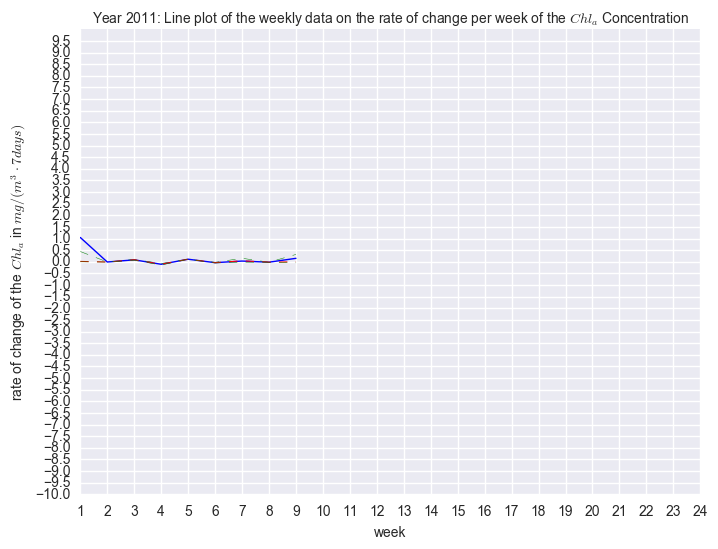

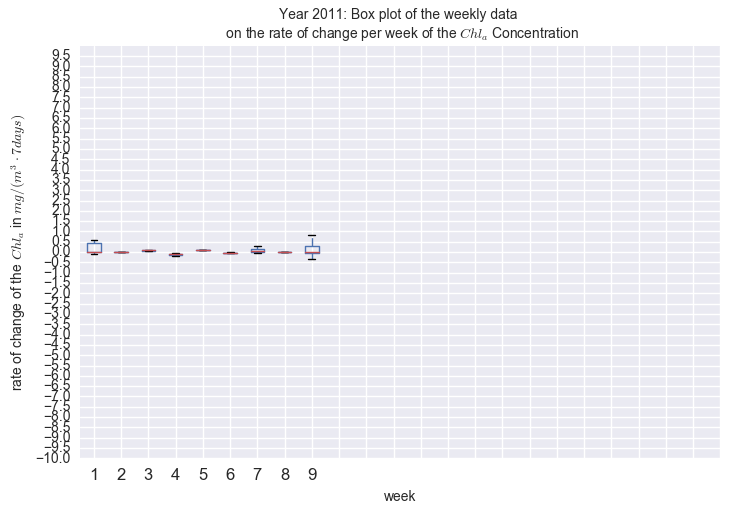


 summary statistics of chl_rate_week for the year 2012 

count    92.000000
mean     -0.040408
std       9.686297
min     -45.659181
25%      -0.367191
50%       0.002440
75%       0.535387
max      63.718582
Name: chl_rate_week, dtype: float64


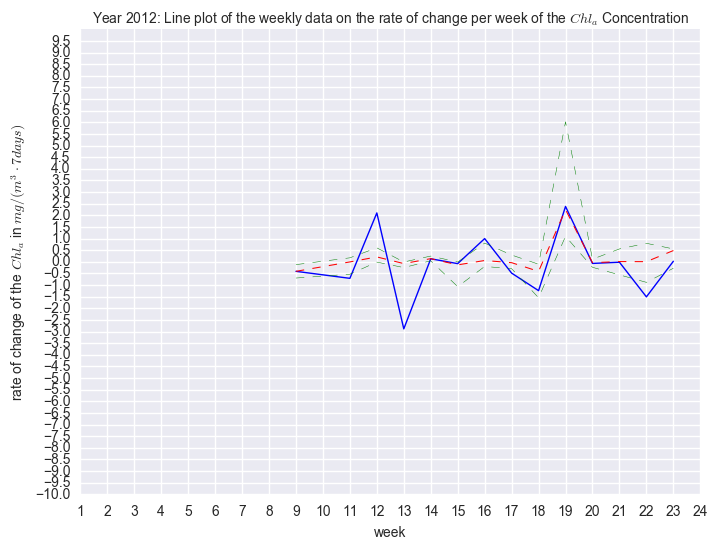

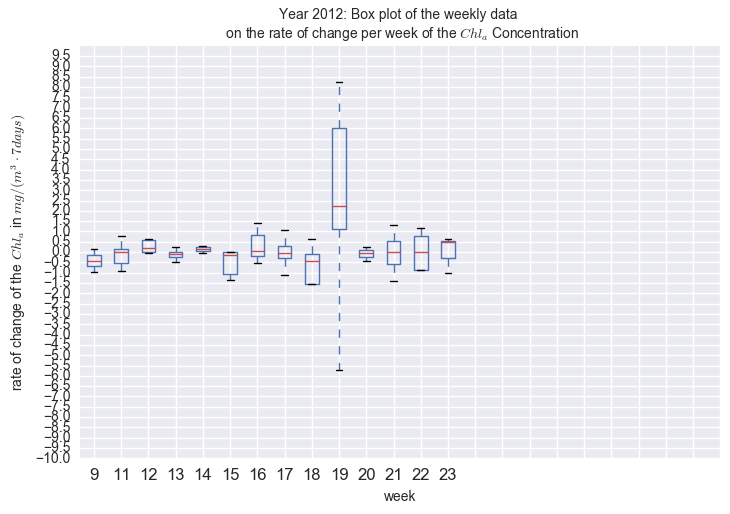


 summary statistics of chl_rate_week for the year 2013 

count    101.000000
mean       0.081242
std        1.239407
min       -7.956510
25%       -0.158827
50%       -0.001653
75%        0.275481
max        7.508984
Name: chl_rate_week, dtype: float64


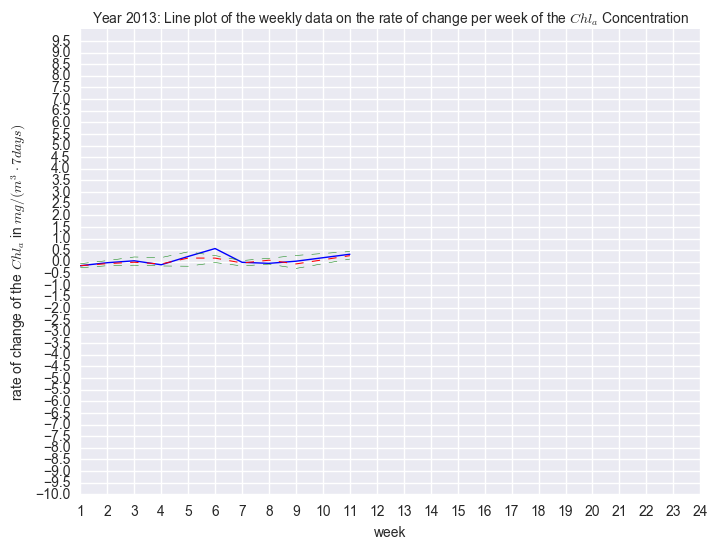

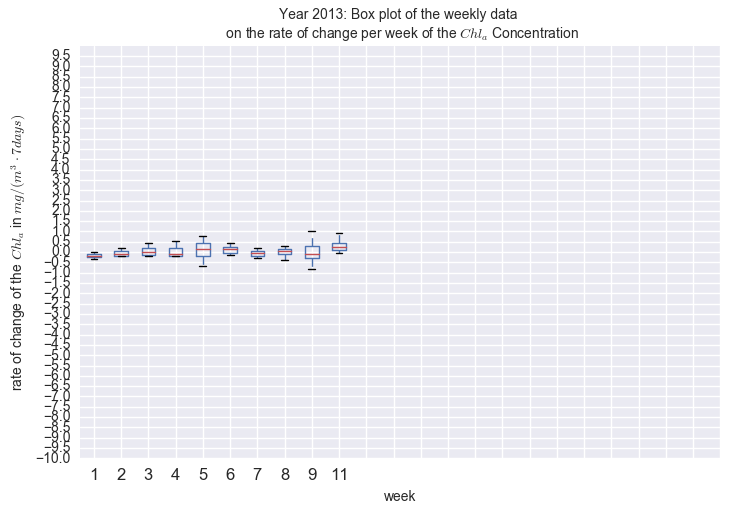


 summary statistics of chl_rate_week for the year 2014 

count    415.000000
mean       0.044642
std       16.615929
min     -118.908850
25%       -0.386717
50%       -0.010398
75%        0.320548
max      144.372604
Name: chl_rate_week, dtype: float64


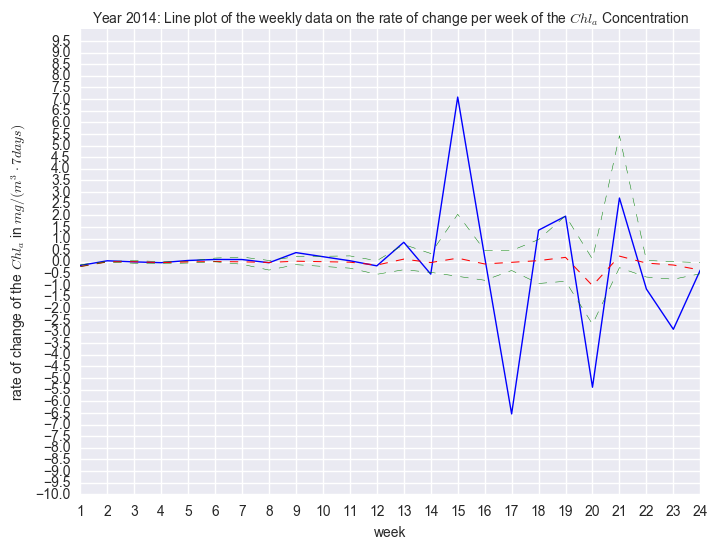

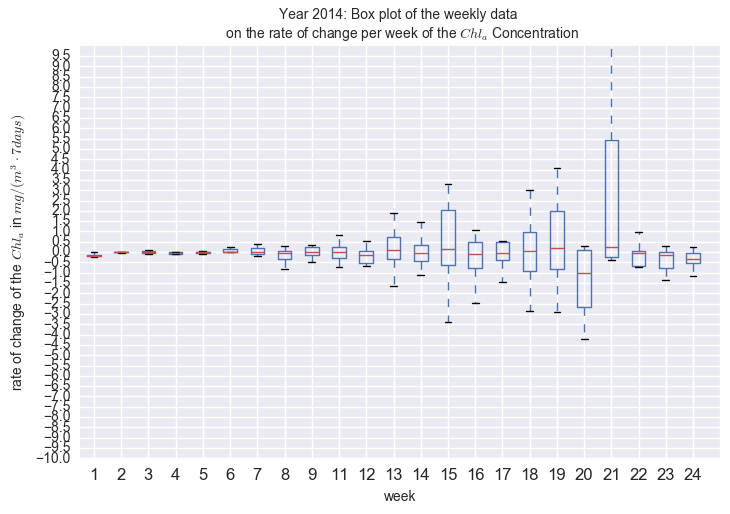


 summary statistics of chl_rate_week for the year 2015 

count    245.000000
mean       1.474546
std       14.973212
min      -72.187329
25%       -0.166308
50%        0.026891
75%        0.266506
max      139.555398
Name: chl_rate_week, dtype: float64


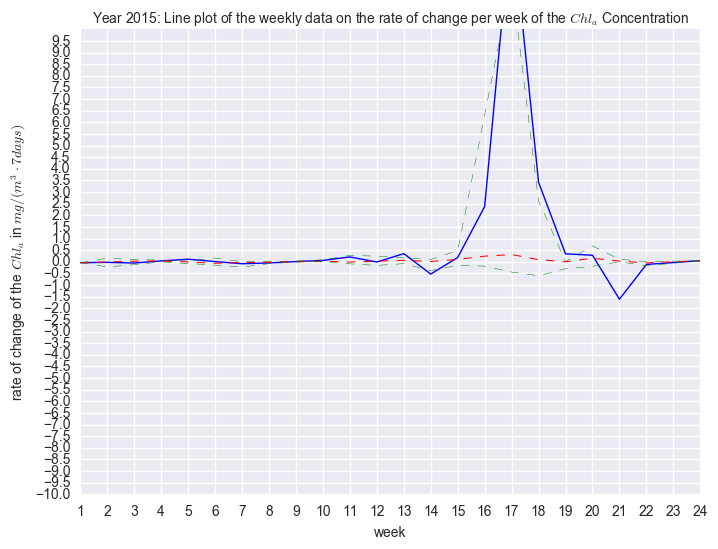

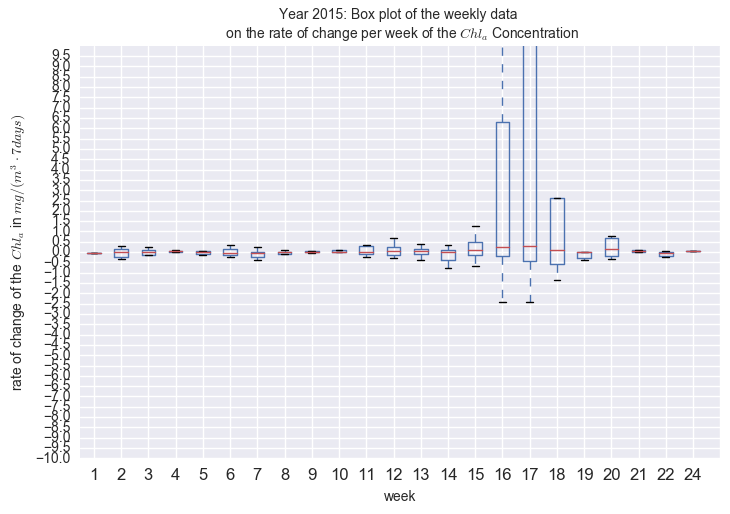


 summary statistics of chl_rate_week for the year 2016 

count    103.000000
mean       0.012770
std        1.641607
min      -10.818189
25%       -0.039095
50%        0.007569
75%        0.054186
max       10.526400
Name: chl_rate_week, dtype: float64


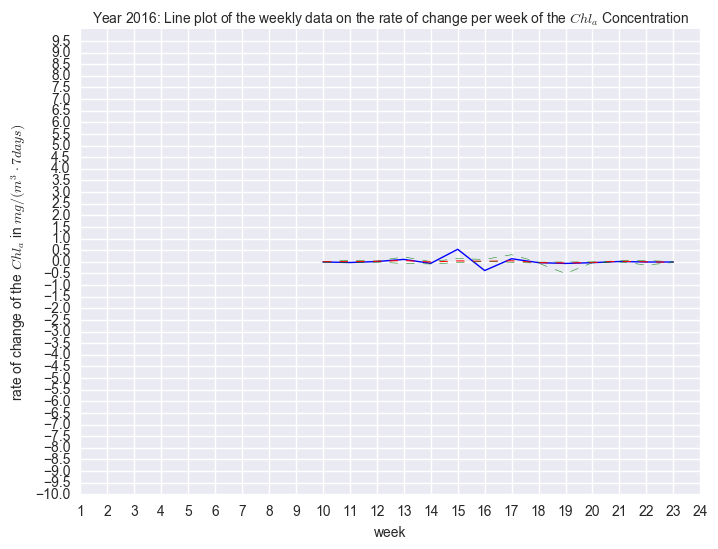

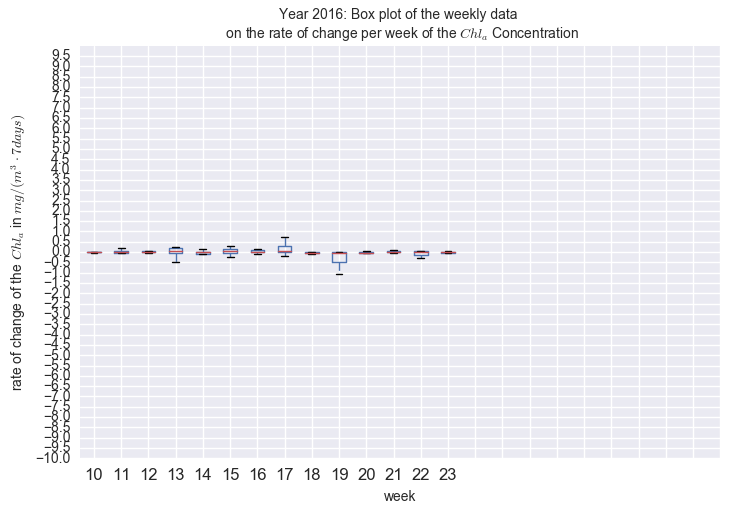

In [13]:
# [print(i) for i in range(year_min,year_max+1)]
# for  each year


for current_year in range(year_min, year_max+1):
    mask = df_timed.year == current_year
    df_yearly = df_timed[mask]

    print('\n summary statistics of chl_rate_week for the year %d \n' % (current_year) )
    print(df_yearly.chl_rate_week.describe())


    plt.figure(figsize=(8,6))
    axes1=df_yearly.groupby(['week_rotate'])['chl_rate_week'].mean().plot(linestyle="-",color='b', linewidth=1)
    df_yearly.groupby(['week_rotate'])['chl_rate_week'].quantile(.75).plot(linestyle="--",color='g', linewidth=0.35)
    df_yearly.groupby(['week_rotate'])['chl_rate_week'].quantile(.50).plot(linestyle="--",color='r', linewidth=0.75)
    df_yearly.groupby(['week_rotate'])['chl_rate_week'].quantile(.25).plot(linestyle="--",color='g', linewidth=0.35)
    axes1.set_ylim(-10, 10)
    axes1.set_title("Year " + str(current_year) + ": Line plot of the weekly data on the rate of change per week of the $Chl_a$ Concentration",  fontsize=10)
    plt.xlabel('week', fontsize=10)
    plt.ylabel('rate of change of the $Chl_a$ in $mg/(m^3 \cdot 7days)$', fontsize=10)
    plt.yticks(np.arange(-10, 10, 0.5))
    plt.xticks(np.arange(1, 25, 1))
    plt.show()
    plt.close()


    # http://pandas.pydata.org/pandas-docs/version/0.19.1/visualization.html
    #http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/
    plt.figure(figsize=(8,6))
    axes2 = df_yearly.boxplot(column='chl_rate_week', by='week_rotate')
    axes2.set_ylim(-10, 10)
    #axes2.set_title("Box plot of the weekly data \n on the rate of change per week of the $Chl_a$ Concentration",  fontsize=10)
    plt.title("Year " + str(current_year) + ": Box plot of the weekly data \n on the rate of change per week of the $Chl_a$ Concentration",  fontsize=10)
    plt.suptitle("") # remove auto-title
    plt.xlabel('week', fontsize=10)
    plt.ylabel('rate of change of the $Chl_a$ in $mg/(m^3 \cdot 7days)$', fontsize=10)
    plt.yticks(np.arange(-10, 10, 0.5))
    plt.xticks(np.arange(1, 25, 1))
    plt.show()
    plt.close()
    # the rate of change is slower on the regular scale

#matplotlib.pyplot.close("all")
plt.close('all')
plt.cla()  # axis
plt.clf()  # figure
plt.show()